<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/multi_stock_XGBoost_rf_walkforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get remove --purge -y cuda* libcuda* nvidia* || echo "No conflicting CUDA packages"
!apt-get autoremove -y
!apt-get clean

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'cuda-toolkit-12-4-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-7' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-8' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-5-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-2' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-3' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-4' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-5' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-6' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-8' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-6-config-common' for glob 'cuda*'
Note, selecting 'cuda-opencl-d

In [2]:
#Protocol Buffer Fix (for TensorFlow)
!pip uninstall -y protobuf
!pip install protobuf==3.20.3

Found existing installation: protobuf 5.29.4
Uninstalling protobuf-5.29.4:
  Successfully uninstalled protobuf-5.29.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 4.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.17.1 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.


In [3]:
#Update Colab Environment and System Libraries
!apt-get update -y && apt-get upgrade -y


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,604 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,848 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/uni

In [4]:
#Install Correct Version of CUDA for Colab GPU
!apt-get update -qq && apt-get install -y \
    libcusolver11 libcusparse11 libcurand10 libcufft10 libnppig10 libnppc10 libnppial10 \
    cuda-toolkit-12-4

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libnppig10
E: Unable to locate package libnppc10
E: Unable to locate package libnppial10


In [5]:
#Set Correct CUDA Paths
import os
os.environ['CUDA_HOME'] = '/usr/local/cuda-12.4'
os.environ['PATH'] += ':/usr/local/cuda-12.4/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-12.4/lib64'


In [6]:
#Install RAPIDS and NVIDIA Dependencies
!pip install --extra-index-url=https://pypi.nvidia.com \
    cuml-cu12==25.2.0 cudf-cu12==25.2.0 cupy-cuda12x dask-cuda==25.2.0 dask-cudf-cu12==25.2.0


Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 45.5 MB/s eta 0:00:00
  Attempting uninstall: cudf-cu12
    Found existing installation: cudf-cu12 25.2.1
    Uninstalling cudf-cu12-25.2.1:
      Successfully uninstalled cudf-cu12-25.2.1
  Attempting uninstall: dask-cudf-cu12
    Found existing installation: dask-cudf-cu12 25.2.2
    Uninstalling dask-cudf-cu12-25.2.2:
      Successfully uninstalled dask-cudf-cu12-25.2.2
  Attempting uninstall: cuml-cu12
    Found existing installation: cuml-cu12 25.2.1
    Uninstalling cuml-cu12-25.2.1:
      Successfully uninstalled cuml-cu12-25.2.1


In [7]:
#Install TensorFlow (latest GPU-compatible version)
!pip install tensorflow==2.18.0

#Install Stable Baselines3 and Trading Libraries
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib

#Install Miscellaneous Libraries
!pip install matplotlib scikit-learn pandas numba==0.61.0

#Install PyTorch with GPU Support
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [8]:
#Install TensorFlow (latest GPU-compatible version)
!pip install tensorflow==2.18.0


import tensorflow as tf

gpus = tf.config.list_physical_devices("GPU")
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("TensorFlow GPU memory growth enabled")
    except RuntimeError as e:
        print(f"TensorFlow GPU memory config failed: {e}")


In [10]:
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance --quiet
!pip install stable-baselines3[extra] --quiet


In [1]:
#Import Required Libraries
import gc
import json
import os
import random
import time
from collections import deque
from datetime import datetime

import cupy as cp
import cudf
import cuml
import dask
import gymnasium as gym
import gym_anytrading
import joblib
import lightgbm as lgb
import matplotlib.pyplot as plt
import numba
import numpy as np
import pandas as pd
import torch
import xgboost as xgb
import yfinance as yf
from cuml.ensemble import RandomForestClassifier
from gym_anytrading.envs import StocksEnv
from gymnasium.spaces import Box
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from stable_baselines3 import PPO, SAC
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv

#Ticker List and CONFIG
ticker_list = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]

strategy_name = "sac_ppo_td3_multi_stock_v1"

CONFIG = {
    'symbols': [],
    'period': '720d',
    'interval': '1h',
    'target': 'Target',
    'sharpe_threshold': 1.5,
    'return_threshold': 1.25,
    'strategy_name': strategy_name
}
#Import Required Libraries
import gc
import json
import os
import random
import time
from collections import deque
from datetime import datetime

import cupy as cp
import cudf
import cuml
import dask
import gymnasium as gym
import gym_anytrading
import joblib
import lightgbm as lgb
import matplotlib.pyplot as plt
import numba
import numpy as np
import pandas as pd
import torch
import xgboost as xgb
import yfinance as yf
from cuml.ensemble import RandomForestClassifier
from gym_anytrading.envs import StocksEnv
from gymnasium.spaces import Box
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from stable_baselines3 import PPO, SAC
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv

#Ticker List and CONFIG
ticker_list = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]


def download_stock_data(ticker, period="720d", interval="1h", max_retries=5):
    for attempt in range(1, max_retries + 1):
        try:
            print(f"Attempt {attempt}: Downloading {ticker}...")
            df = yf.download(ticker, period=period, interval=interval)
            if not df.empty:
                df.reset_index(inplace=True)
                df['Symbol'] = ticker
                return df
            raise ValueError("Empty data")
        except Exception as e:
            print(f"Error: {e}. Retrying in {attempt * 5} sec...")
            time.sleep(attempt * 5)
    print(f"Failed to download {ticker}")
    return None

#Feature Engineering Function
def compute_enhanced_features(df):
    df = df.copy()
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    df = df.loc[:, ~df.columns.duplicated()]

    df['SMA_20'] = df['Close'].rolling(20).mean()
    df['STD_20'] = df['Close'].rolling(20).std()
    df['Upper_Band'] = df['SMA_20'] + 2 * df['STD_20']
    df['Lower_Band'] = df['SMA_20'] - 2 * df['STD_20']
    df['Lowest_Low'] = df['Low'].rolling(14).min()
    df['Highest_High'] = df['High'].rolling(14).max()
    denom = (df['Highest_High'] - df['Lowest_Low']).replace(0, np.nan)
    df['Stoch'] = ((df['Close'] - df['Lowest_Low']) / denom) * 100
    df['ROC'] = df['Close'].pct_change(10)
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).cumsum()
    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (0.015 * typical_price.rolling(20).std())
    df['PROC'] = ((df['Close'] - df['Close'].shift(12)) / df['Close'].shift(12)) * 100
    df['Rolling_Mean_50'] = df['Close'].rolling(50).mean()
    df['Expanding_Mean'] = df['Close'].expanding().mean()
    df['EMA_10'] = df['Close'].ewm(span=10).mean()
    df['EMA_50'] = df['Close'].ewm(span=50).mean()
    df['MACD_Line'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['MACD_Signal'] = df['MACD_Line'].ewm(span=9).mean()
    df['MACD_Hist'] = df['MACD_Line'] - df['MACD_Signal']
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['True_Range'] = df[['High', 'Low', 'Close']].apply(
        lambda x: max(x.iloc[0] - x.iloc[1], abs(x.iloc[0] - x.iloc[2]), abs(x.iloc[1] - x.iloc[2])), axis=1)
    df['ATR'] = df['True_Range'].rolling(14).mean()
    df['+DM'] = np.where((df['High'].diff() > df['Low'].diff()) & (df['High'].diff() > 0), df['High'].diff(), 0)
    df['-DM'] = np.where((df['Low'].diff() > df['High'].diff()) & (df['Low'].diff() > 0), df['Low'].diff(), 0)
    df['+DI'] = 100 * df['+DM'].rolling(14).mean() / df['ATR']
    df['-DI'] = 100 * df['-DM'].rolling(14).mean() / df['ATR']
    df['ADX'] = abs(df['+DI'] - df['-DI']).rolling(14).mean()
    df['Volume_Avg'] = df['Volume'].rolling(20).mean()
    df['Volume_Change'] = df['Volume'].pct_change()
    df['Volume_Change_MA'] = df['Volume_Change'].rolling(10).mean()
    df['Volume_Change_Ratio'] = df['Volume_Change'] / df['Volume_Change'].shift(1)
    df['Relative_Volume'] = df['Volume'] / df['Volume_Avg']
    df['Trailing_Stop'] = np.minimum(df['Close'] * 0.985, df['Close'] - (df['ATR'] * 0.3))
    df['Buy_Signal'] = np.where((df['RSI'] < 60) & (df['EMA_10'] > df['EMA_50']) &
                                ((df['MACD_Line'] > df['MACD_Signal']) | (df['MACD_Line'].diff() > 0)) &
                                (df['Volume'] > (0.4 * df['Volume_Avg'])) & (df['ADX'] > 18), 1, 0)
    df['Sell_Signal'] = np.where(((df['EMA_10'] < df['EMA_50']) & (df['RSI'] > 60)) |
                                 ((df['MACD_Line'] < df['MACD_Signal']) & (df['RSI'] > 65)) |
                                 (df['Close'] < df['Trailing_Stop']) |
                                 ((df['Volume'] > 0.5 * df['Volume_Avg']) & (df['ADX'] > 20)), 1, 0)
    df['Sell_Signal_Debug'] = np.where(((df['MACD_Hist'] < 0.5) | (df['MACD_Line'] < df['MACD_Signal'])) &
                                       (df['RSI'] < 55) & (df['ADX'] > 15) &
                                       ((df['Close'] < df['Trailing_Stop']) | (df['EMA_10'] < df['EMA_50'])) &
                                       (df['Volume'] > 0.5 * df['Volume_Avg']), 1, 0)
    df['Future_Close'] = df['Close'].shift(-10)
    df['Volatility'] = df['Close'].pct_change().rolling(window=20).std()
    df['Return'] = (df['Future_Close'] - df['Close']) / df['Close']
    df['Target'] = np.select([df['Return'] > 0.02, df['Return'] < -0.02], [1, -1], default=0)
    df['Multi_Class_Target'] = df['Target']
    df['Hour'] = pd.to_datetime(df['Datetime']).dt.hour
    df['DayOfWeek'] = pd.to_datetime(df['Datetime']).dt.dayofweek
    df['Session'] = np.where((df['Hour'] >= 9) & (df['Hour'] <= 16), 'Regular',
                             np.where((df['Hour'] < 9), 'Pre-market', 'After-hours'))
    df['MACD_Crossover'] = np.where(df['MACD_Line'] > df['MACD_Signal'], 1, 0)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    return df

all_dfs = []

for ticker in ticker_list:
    df_single = download_stock_data(ticker, period=CONFIG['period'], interval=CONFIG['interval'])
    if df_single is not None:
        try:
            df_features = compute_enhanced_features(df_single)
            all_dfs.append(df_features)
        except Exception as e:
            print(f"Feature engineering failed for {ticker}: {e}")
    else:
        print(f"Failed to download {ticker}")

if all_dfs:
    df = pd.concat(all_dfs, ignore_index=True)
    print(f"Combined dataset created with shape: {df.shape}")
else:
    df = pd.DataFrame()
    print("No data available.")

if not df.empty:
    df.to_csv("multi_stock_feature_engineered_dataset.csv", index=False)
    print("Saved locally to multi_stock_feature_engineered_dataset.csv")

    drive_path = "/content/drive/MyDrive/trading_data/"
    os.makedirs(drive_path, exist_ok=True)
    df.to_csv(os.path.join(drive_path, "multi_stock_feature_engineered_dataset.csv"), index=False)
    print(f"Also saved to Google Drive at {drive_path}multi_stock_feature_engineered_dataset.csv")


#Download Function
def download_stock_data(ticker, period="720d", interval="1h", max_retries=5):
    for attempt in range(1, max_retries + 1):
        try:
            print(f"Attempt {attempt}: Downloading {ticker}...")
            df = yf.download(ticker, period=period, interval=interval)
            if not df.empty:
                df.reset_index(inplace=True)
                df['Symbol'] = ticker
                return df
            raise ValueError("Empty data")
        except Exception as e:
            print(f"Error: {e}. Retrying...")
            time.sleep(attempt * 5)
    print(f"Failed to download {ticker}")
    return None

#Feature Engineering
def compute_enhanced_features(df):
    df = df.copy()
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    df = df.loc[:, ~df.columns.duplicated()]

    df['SMA_20'] = df['Close'].rolling(20).mean()
    df['STD_20'] = df['Close'].rolling(20).std()
    df['Upper_Band'] = df['SMA_20'] + 2 * df['STD_20']
    df['Lower_Band'] = df['SMA_20'] - 2 * df['STD_20']
    df['Lowest_Low'] = df['Low'].rolling(14).min()
    df['Highest_High'] = df['High'].rolling(14).max()
    denom = (df['Highest_High'] - df['Lowest_Low']).replace(0, np.nan)
    df['Stoch'] = ((df['Close'] - df['Lowest_Low']) / denom) * 100
    df['ROC'] = df['Close'].pct_change(10)
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).cumsum()
    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (0.015 * typical_price.rolling(20).std())
    df['PROC'] = ((df['Close'] - df['Close'].shift(12)) / df['Close'].shift(12)) * 100
    df['Rolling_Mean_50'] = df['Close'].rolling(50).mean()
    df['Expanding_Mean'] = df['Close'].expanding().mean()
    df['EMA_10'] = df['Close'].ewm(span=10).mean()
    df['EMA_50'] = df['Close'].ewm(span=50).mean()
    df['MACD_Line'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['MACD_Signal'] = df['MACD_Line'].ewm(span=9).mean()
    df['MACD_Hist'] = df['MACD_Line'] - df['MACD_Signal']
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['True_Range'] = df[['High', 'Low', 'Close']].apply(
        lambda x: max(x.iloc[0] - x.iloc[1], abs(x.iloc[0] - x.iloc[2]), abs(x.iloc[1] - x.iloc[2])), axis=1)
    df['ATR'] = df['True_Range'].rolling(14).mean()
    df['+DM'] = np.where((df['High'].diff() > df['Low'].diff()) & (df['High'].diff() > 0), df['High'].diff(), 0)
    df['-DM'] = np.where((df['Low'].diff() > df['High'].diff()) & (df['Low'].diff() > 0), df['Low'].diff(), 0)
    df['+DI'] = 100 * df['+DM'].rolling(14).mean() / df['ATR']
    df['-DI'] = 100 * df['-DM'].rolling(14).mean() / df['ATR']
    df['ADX'] = abs(df['+DI'] - df['-DI']).rolling(14).mean()
    df['Volume_Avg'] = df['Volume'].rolling(20).mean()
    df['Volume_Change'] = df['Volume'].pct_change()
    df['Volume_Change_MA'] = df['Volume_Change'].rolling(10).mean()
    df['Volume_Change_Ratio'] = df['Volume_Change'] / df['Volume_Change'].shift(1)
    df['Relative_Volume'] = df['Volume'] / df['Volume_Avg']
    df['Trailing_Stop'] = np.minimum(df['Close'] * 0.985, df['Close'] - (df['ATR'] * 0.3))
    df['Buy_Signal'] = np.where((df['RSI'] < 60) & (df['EMA_10'] > df['EMA_50']) &
                                ((df['MACD_Line'] > df['MACD_Signal']) | (df['MACD_Line'].diff() > 0)) &
                                (df['Volume'] > (0.4 * df['Volume_Avg'])) & (df['ADX'] > 18), 1, 0)
    df['Sell_Signal'] = np.where(((df['EMA_10'] < df['EMA_50']) & (df['RSI'] > 60)) |
                                 ((df['MACD_Line'] < df['MACD_Signal']) & (df['RSI'] > 65)) |
                                 (df['Close'] < df['Trailing_Stop']) |
                                 ((df['Volume'] > 0.5 * df['Volume_Avg']) & (df['ADX'] > 20)), 1, 0)
    df['Sell_Signal_Debug'] = np.where(((df['MACD_Hist'] < 0.5) | (df['MACD_Line'] < df['MACD_Signal'])) &
                                       (df['RSI'] < 55) & (df['ADX'] > 15) &
                                       ((df['Close'] < df['Trailing_Stop']) | (df['EMA_10'] < df['EMA_50'])) &
                                       (df['Volume'] > 0.5 * df['Volume_Avg']), 1, 0)
    df['Future_Close'] = df['Close'].shift(-10)
    df['Volatility'] = df['Close'].pct_change().rolling(window=20).std()
    df['Return'] = (df['Future_Close'] - df['Close']) / df['Close']
    df['Target'] = np.select([df['Return'] > 0.02, df['Return'] < -0.02], [1, -1], default=0)
    df['Multi_Class_Target'] = df['Target']
    df['Hour'] = pd.to_datetime(df['Datetime']).dt.hour
    df['DayOfWeek'] = pd.to_datetime(df['Datetime']).dt.dayofweek
    df['Session'] = np.where((df['Hour'] >= 9) & (df['Hour'] <= 16), 'Regular',
                             np.where((df['Hour'] < 9), 'Pre-market', 'After-hours'))
    df['MACD_Crossover'] = np.where(df['MACD_Line'] > df['MACD_Signal'], 1, 0)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    return df


/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


Attempt 1: Downloading AAPL...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading TSLA...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MSFT...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading GOOGL...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AMZN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading NVDA...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading META...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading BRK-B...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading JPM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading JNJ...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading XOM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading V...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PG...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading UNH...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MA...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading HD...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading LLY...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MRK...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PEP...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading KO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading BAC...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ABBV...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AVGO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PFE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading COST...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading CSCO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading TMO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ABT...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ACN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading WMT...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MCD...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ADBE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading DHR...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading CRM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading NKE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading INTC...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading QCOM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading NEE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AMD...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading TXN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AMGN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading UPS...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading LIN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading UNP...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading BMY...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading LOW...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading RTX...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading CVX...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading IBM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading GE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading SBUX...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ORCL...


[*********************100%***********************]  1 of 1 completed


Combined dataset created with shape: (262327, 51)
Saved locally to multi_stock_feature_engineered_dataset.csv
Also saved to Google Drive at /content/drive/MyDrive/trading_data/multi_stock_feature_engineered_dataset.csv


   Ticker  Accuracy
29    WMT    0.9261
12     PG    0.9053
19     KO    0.8858
18    PEP    0.8689
30    MCD    0.8639
🔍 AAPL prediction distribution:
 0    2828
1    1826
2     279
Name: count, dtype: int64
📊 AAPL signal distribution:
 Trade_Signal_XGB
 0    2828
 1    1826
-1     279
Name: count, dtype: int64
AAPL | Final: $99,442.79 | Return: -0.56% | Sharpe: -0.05
🔍 TSLA prediction distribution:
 0    1963
2    1955
1    1019
Name: count, dtype: int64
📊 TSLA signal distribution:
 Trade_Signal_XGB
 0    1963
-1    1955
 1    1019
Name: count, dtype: int64
TSLA | Final: $96,749.42 | Return: -3.25% | Sharpe: -0.20
🔍 MSFT prediction distribution:
 1    4278
0     452
2     203
Name: count, dtype: int64
📊 MSFT signal distribution:
 Trade_Signal_XGB
 1    4278
 0     452
-1     203
Name: count, dtype: int64
MSFT | Final: $99,268.41 | Return: -0.73% | Sharpe: -0.06
🔍 GOOGL prediction distribution:
 1    4446
0     281
2     220
Name: count, dtype: int64
📊 GOOGL signal distribution:
 Trad

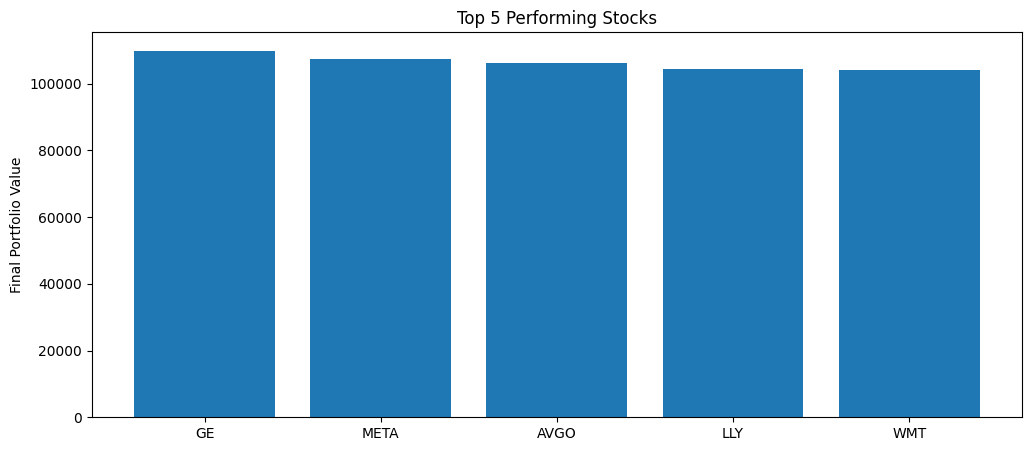

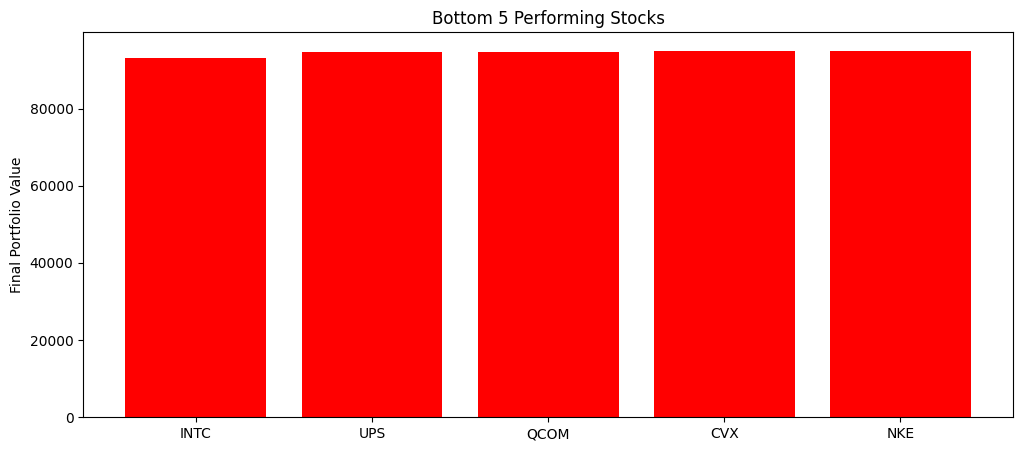

In [14]:
# === Imports ===
import os
import joblib
import gc
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from concurrent.futures import ThreadPoolExecutor

# === Load Data ===
df = pd.read_csv("multi_stock_feature_engineered_dataset.csv")
df['Datetime'] = pd.to_datetime(df['Datetime']).dt.tz_localize(None)

# === Config ===
features = ['SMA_20', 'STD_20', 'Upper_Band', 'Lower_Band', 'Stoch']
target = 'Target'
label_map = {-1: 0, 0: 1, 1: 2}
model_dir = "results/xgb_walkforward/models"
os.makedirs(model_dir, exist_ok=True)

# === Training Function ===
def train_xgb_for_ticker(df, ticker):
    df_ticker = df[df['Symbol'] == ticker].copy()
    df_ticker = df_ticker.dropna(subset=features + [target])
    df_ticker['Target_Mapped'] = df_ticker[target].map(label_map)
    df_ticker['Datetime'] = pd.to_datetime(df_ticker['Datetime']).dt.tz_localize(None)

    train_start, train_end, test_end = pd.to_datetime("2022-01-01"), pd.to_datetime("2023-01-01"), pd.to_datetime("2024-01-01")
    df_window = df_ticker[(df_ticker['Datetime'] >= train_start) & (df_ticker['Datetime'] < test_end)]

    if len(df_window) < 200:
        print(f"Skipping {ticker}: Not enough data.")
        return None

    train_df = df_window[(df_window['Datetime'] >= train_start) & (df_window['Datetime'] < train_end)]
    test_df = df_window[(df_window['Datetime'] >= train_end) & (df_window['Datetime'] < test_end)]

    X_train, y_train = train_df[features], train_df['Target_Mapped']
    X_test, y_test = test_df[features], test_df['Target_Mapped']

    model = xgb.XGBClassifier(n_estimators=50, learning_rate=0.1, tree_method='hist', random_state=42)
    model.fit(X_train, y_train)

    acc = accuracy_score(y_test, model.predict(X_test))
    joblib.dump(model, f"{model_dir}/{ticker}_xgb_model.pkl")

    return {"Ticker": ticker, "Accuracy": round(acc, 4)}

# === Parallel Training ===
def train_all_tickers(df):
    tickers = df['Symbol'].unique()
    results = []

    with ThreadPoolExecutor(max_workers=min(len(tickers), os.cpu_count() or 1)) as executor:
        for res in executor.map(lambda t: train_xgb_for_ticker(df, t), tickers):
            if res:
                results.append(res)

    summary_df = pd.DataFrame(results)
    summary_df.to_csv("results/xgb_walkforward/summary.csv", index=False)
    print(summary_df.sort_values("Accuracy", ascending=False).head())

# === Updated Portfolio Simulation ===
def simulate_xgb_trades_multi_stock(
    df,
    model_dir,
    features,
    capital_start=100000,
    trade_size=0.05,
    transaction_cost=0.001,
    max_capital=150000
):
    results = []

    for symbol in df['Symbol'].unique():
        model_path = f"{model_dir}/{symbol}_xgb_model.pkl"
        if not os.path.exists(model_path):
            print(f"No model found for {symbol}, skipping.")
            continue

        model = joblib.load(model_path)
        df_symbol = df[df['Symbol'] == symbol].copy()
        df_symbol['Datetime'] = pd.to_datetime(df_symbol['Datetime']).dt.tz_localize(None)

        # Avoid lookahead by shifting predictions
        X_pred = df_symbol[features].shift(1).bfill()

        try:
            preds = pd.Series(model.predict(X_pred), index=df_symbol.index)
            print(f"🔍 {symbol} prediction distribution:\n", preds.value_counts())
            df_symbol['Trade_Signal_XGB'] = preds.map({0: 0, 1: 1, 2: -1}).fillna(0)
            print(f"📊 {symbol} signal distribution:\n", df_symbol['Trade_Signal_XGB'].value_counts())
        except Exception as e:
            print(f"Prediction failed for {symbol}: {e}")
            continue

        capital = capital_start
        shares = 0
        buy_price = None
        portfolio_values = []

        for i, signal in enumerate(df_symbol['Trade_Signal_XGB']):
            price = df_symbol['Close'].iloc[i]
            if signal == 1 and capital >= price and buy_price is None:
                amount = capital * trade_size
                shares = amount // price
                total_cost = shares * price * (1 + transaction_cost)
                if capital >= total_cost and shares > 0:
                    capital -= total_cost
                    buy_price = price
            elif signal == -1 and shares > 0:
                capital += shares * price * (1 - transaction_cost)
                shares = 0
                buy_price = None
            current_value = capital + (shares * price)
            portfolio_values.append(min(current_value, max_capital))

        df_symbol['Portfolio Value'] = portfolio_values
        df_symbol['Daily Return'] = df_symbol['Portfolio Value'].pct_change().fillna(0)

        cumulative_return = ((df_symbol['Portfolio Value'].iloc[-1] / capital_start) - 1) * 100
        sharpe = df_symbol['Daily Return'].mean() / df_symbol['Daily Return'].std() * np.sqrt(252) if df_symbol['Daily Return'].std() > 0 else 0
        drawdown = ((pd.Series(portfolio_values).cummax() - pd.Series(portfolio_values)) / pd.Series(portfolio_values).cummax()).max() * 100

        results.append({
            'Symbol': symbol,
            'Final_Portfolio': df_symbol['Portfolio Value'].iloc[-1],
            'Cumulative_Return_%': cumulative_return,
            'Sharpe': sharpe,
            'Max_Drawdown_%': drawdown
        })

        print(f"{symbol} | Final: ${df_symbol['Portfolio Value'].iloc[-1]:,.2f} | Return: {cumulative_return:.2f}% | Sharpe: {sharpe:.2f}")

    portfolio_df = pd.DataFrame(results)
    os.makedirs("results/xgb_walkforward", exist_ok=True)
    portfolio_df.to_csv("results/xgb_walkforward/xgb_multi_stock_portfolio.csv", index=False)
    return portfolio_df

# === Visualization ===
def visualize_results(df):
    top5 = df.sort_values("Final_Portfolio", ascending=False).head()
    bottom5 = df.sort_values("Final_Portfolio").head()

    plt.figure(figsize=(12, 5))
    plt.bar(top5['Symbol'], top5['Final_Portfolio'])
    plt.title("Top 5 Performing Stocks")
    plt.ylabel("Final Portfolio Value")
    plt.show()

    plt.figure(figsize=(12, 5))
    plt.bar(bottom5['Symbol'], bottom5['Final_Portfolio'], color='red')
    plt.title("Bottom 5 Performing Stocks")
    plt.ylabel("Final Portfolio Value")
    plt.show()

# === Execute All ===
train_all_tickers(df)
portfolio_df = simulate_xgb_trades_multi_stock(df, model_dir=model_dir, features=features)
visualize_results(portfolio_df)


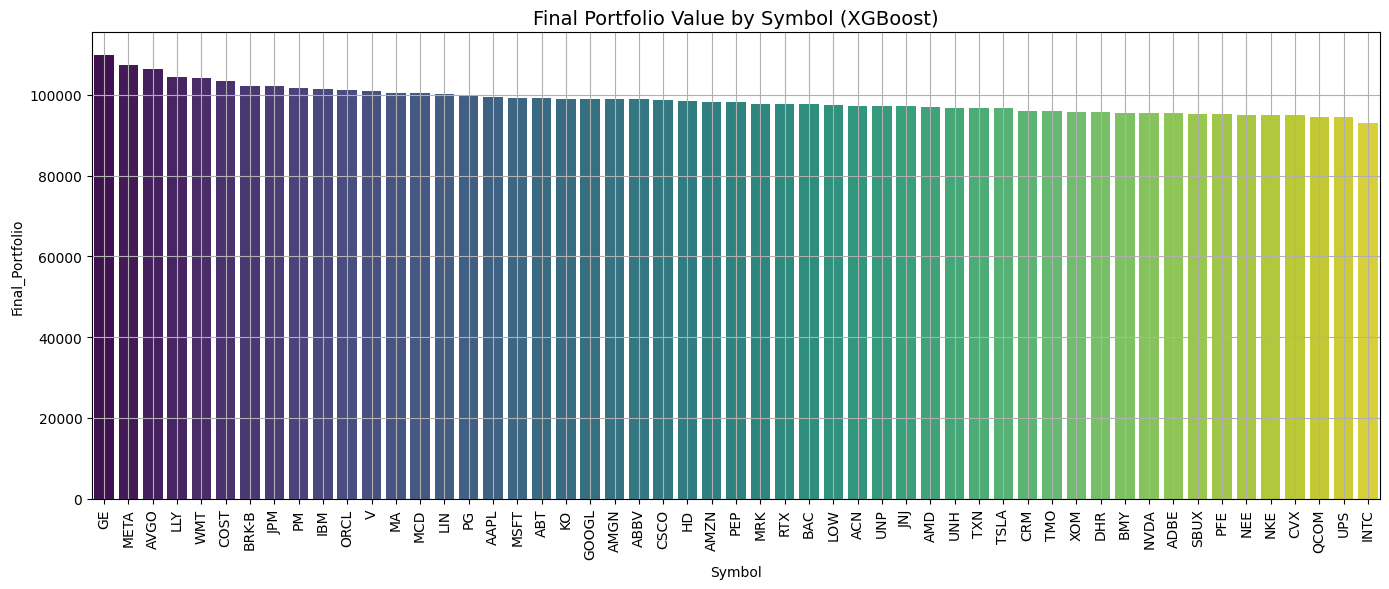

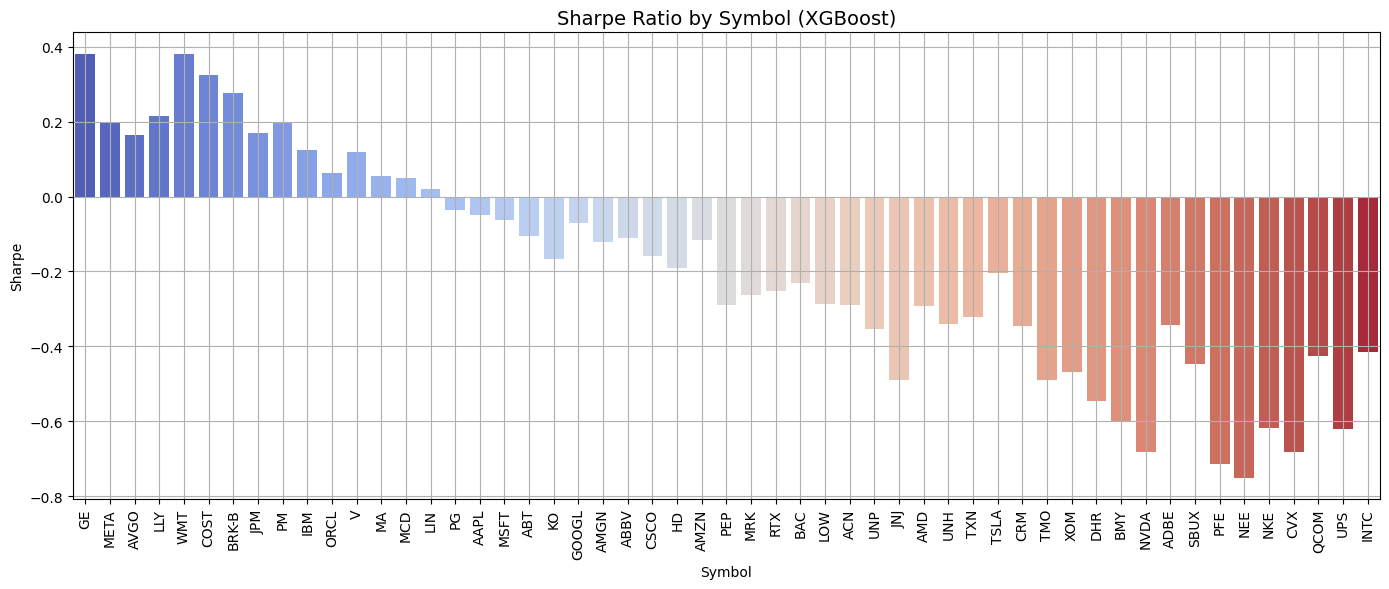

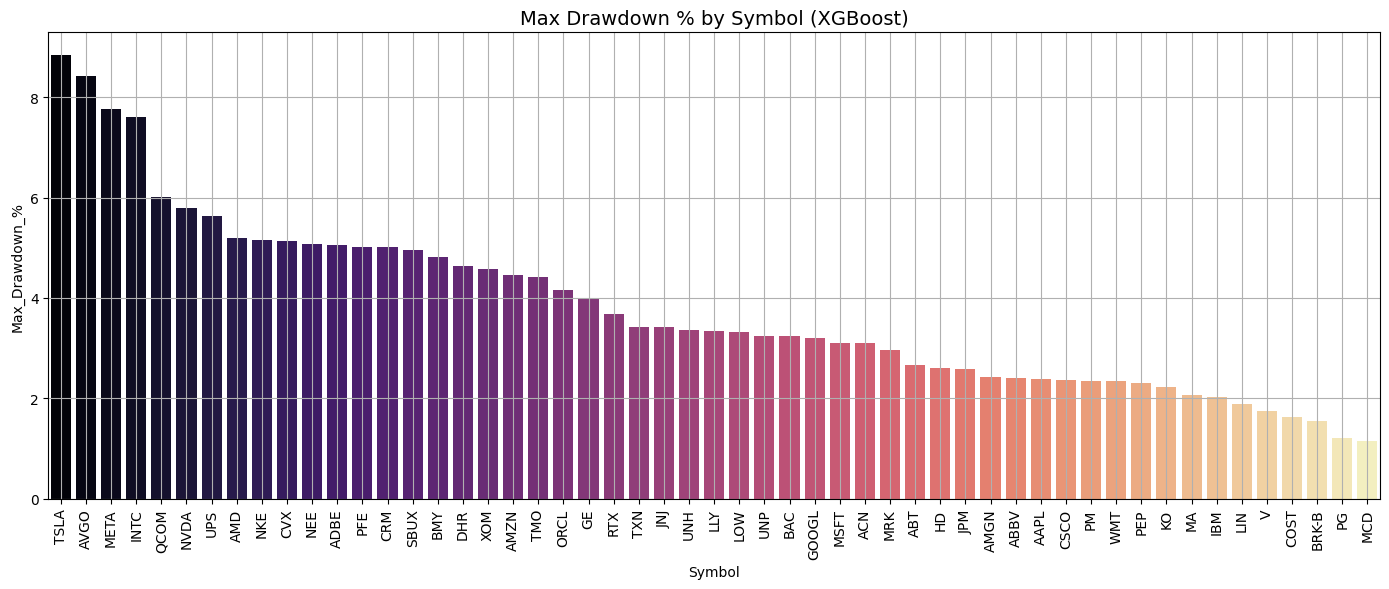

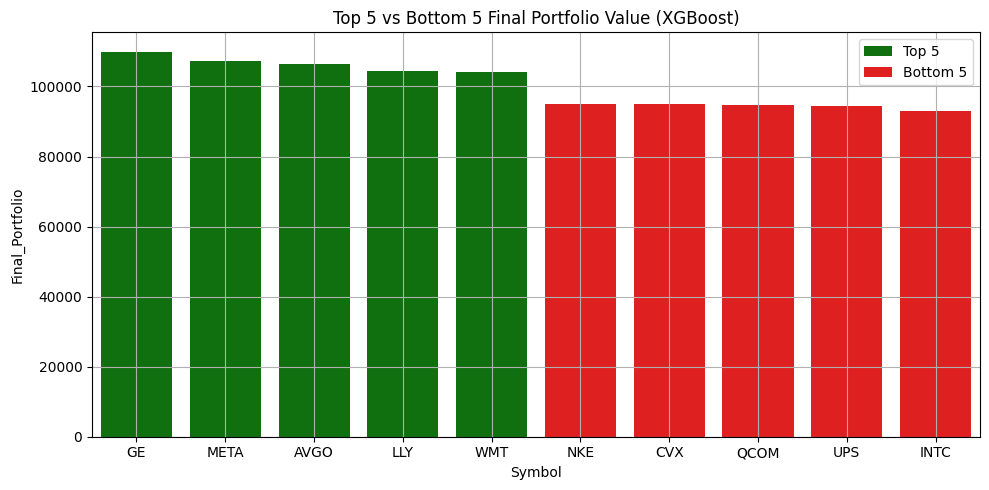

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

df_viz = portfolio_df.copy()
df_viz = df_viz.sort_values(by="Final_Portfolio", ascending=False)

#Final Portfolio Value
plt.figure(figsize=(14, 6))
sns.barplot(x="Symbol", y="Final_Portfolio", data=df_viz, hue="Symbol", palette="viridis", dodge=False, legend=False)
plt.title("Final Portfolio Value by Symbol (XGBoost)", fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

#Sharpe Ratio
plt.figure(figsize=(14, 6))
sns.barplot(x="Symbol", y="Sharpe", data=df_viz, hue="Symbol", palette="coolwarm", dodge=False, legend=False)
plt.title("Sharpe Ratio by Symbol (XGBoost)", fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

#Max Drawdown %
plt.figure(figsize=(14, 6))
sns.barplot(
    x="Symbol", y="Max_Drawdown_%", data=df_viz.sort_values(by="Max_Drawdown_%", ascending=False),
    hue="Symbol", palette="magma", dodge=False, legend=False
)
plt.title("Max Drawdown % by Symbol (XGBoost)", fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

top_5 = df_viz.head(5)
bottom_5 = df_viz.tail(5)

plt.figure(figsize=(10, 5))
sns.barplot(x="Symbol", y="Final_Portfolio", data=top_5, color="green", label="Top 5")
sns.barplot(x="Symbol", y="Final_Portfolio", data=bottom_5, color="red", label="Bottom 5")
plt.title("Top 5 vs Bottom 5 Final Portfolio Value (XGBoost)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
# === Imports ===
import os
import gc
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Dataset ===
df = pd.read_csv("multi_stock_feature_engineered_dataset.csv")
df['Datetime'] = pd.to_datetime(df['Datetime']).dt.tz_localize(None)

# === Config ===
features = ['SMA_20', 'STD_20', 'Upper_Band', 'Lower_Band', 'Stoch']
target = "Target"
label_map = {-1: 0, 0: 1, 1: 2}

# === Date-Based Walkforward Random Forest Trainer + Trade Simulator ===
def walkforward_rf_datebased(df, ticker):
    results = []
    df = df.dropna(subset=features + [target]).copy()
    df['Target_Mapped'] = df[target].map(label_map)

    # Date ranges
    train_start = pd.to_datetime("2022-01-01")
    train_end = pd.to_datetime("2023-01-01")
    test_end = pd.to_datetime("2024-01-01")

    df = df[(df['Datetime'] >= train_start) & (df['Datetime'] < test_end)]
    if df.empty or len(df) < 1000:
        print(f"Skipping {ticker}: not enough data.")
        return results

    train_df = df[(df['Datetime'] >= train_start) & (df['Datetime'] < train_end)]
    test_df = df[(df['Datetime'] >= train_end) & (df['Datetime'] < test_end)]

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(train_df[features], train_df['Target_Mapped'])

    acc = accuracy_score(test_df['Target_Mapped'], model.predict(test_df[features]))

    test_df = test_df.copy()
    test_df['Predicted'] = model.predict(test_df[features].shift(1).bfill())
    test_df['Signal'] = test_df['Predicted'].map({0: 0, 1: 1, 2: -1})

    capital = 100000
    trade_size = 0.05
    transaction_cost = 0.001
    shares = 0
    portfolio = []

    for _, row in test_df.iterrows():
        price = row['Close']
        signal = row['Signal']
        if signal == 1 and capital >= price and shares == 0:
            amount = capital * trade_size
            shares = amount // price
            capital -= shares * price * (1 + transaction_cost)
        elif signal == -1 and shares > 0:
            capital += shares * price * (1 - transaction_cost)
            shares = 0
        portfolio.append(capital + shares * price)

    final_value = portfolio[-1]
    hold_value = (100000 / test_df['Close'].iloc[0]) * test_df['Close'].iloc[-1]
    returns = pd.Series(portfolio).pct_change().fillna(0)
    sharpe = (returns.mean() / (returns.std() + 1e-6)) * np.sqrt(252)
    drawdown = ((pd.Series(portfolio).cummax() - pd.Series(portfolio)) / pd.Series(portfolio).cummax()).max() * 100

    results.append({
        "Ticker": ticker,
        "Train Period": f"{train_start.date()} to {train_end.date()}",
        "Test Period": f"{train_end.date()} to {test_end.date()}",
        "Accuracy": round(acc, 4),
        "Final_Portfolio": round(final_value, 2),
        "BuyHold": round(hold_value, 2),
        "Sharpe": round(sharpe, 3),
        "Drawdown_%": round(drawdown, 2),
        "Winner": "RF" if final_value > hold_value else "Buy & Hold"
    })

    return results

# === Parallel Runner ===
def run_rf_datebased_parallel(tickers):
    os.makedirs("results/rf_walkforward", exist_ok=True)
    results = []
    with ThreadPoolExecutor(max_workers=min(8, os.cpu_count())) as executor:
        for res in executor.map(lambda t: walkforward_rf_datebased(df[df['Symbol'] == t].copy(), t), tickers):
            results.extend(res)
            pd.DataFrame(results).to_csv("results/rf_walkforward/summary.csv", index=False)
    return pd.DataFrame(results)

# === Execute ===
tickers = df['Symbol'].unique()
rf_summary = run_rf_datebased_parallel(tickers)



Loaded 53 rows from Random Forest results


,Ticker,Train Period,Test Period,Accuracy,Final_Portfolio,BuyHold,Sharpe,Drawdown_%,Winner
0,AAPL,2022-01-01 to 2023-01-01,2023-01-01 to 2024-01-01,0.3215,101466.76,153451.30,0.552,0.87,Buy & Hold
1,TSLA,2022-01-01 to 2023-01-01,2023-01-01 to 2024-01-01,0.2755,99606.11,223743.93,-0.113,1.91,Buy & Hold
2,MSFT,2022-01-01 to 2023-01-01,2023-01-01 to 2024-01-01,0.7078,102230.08,156796.78,0.610,0.95,Buy & Hold
3,GOOGL,2022-01-01 to 2023-01-01,2023-01-01 to 2024-01-01,0.6355,101858.17,156995.18,0.450,0.98,Buy & Hold
4,AMZN,2022-01-01 to 2023-01-01,2023-01-01 to 2024-01-01,0.4592,101507.56,179037.68,0.363,1.27,Buy & Hold


<ipython-input-21-566d12200026>:33: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


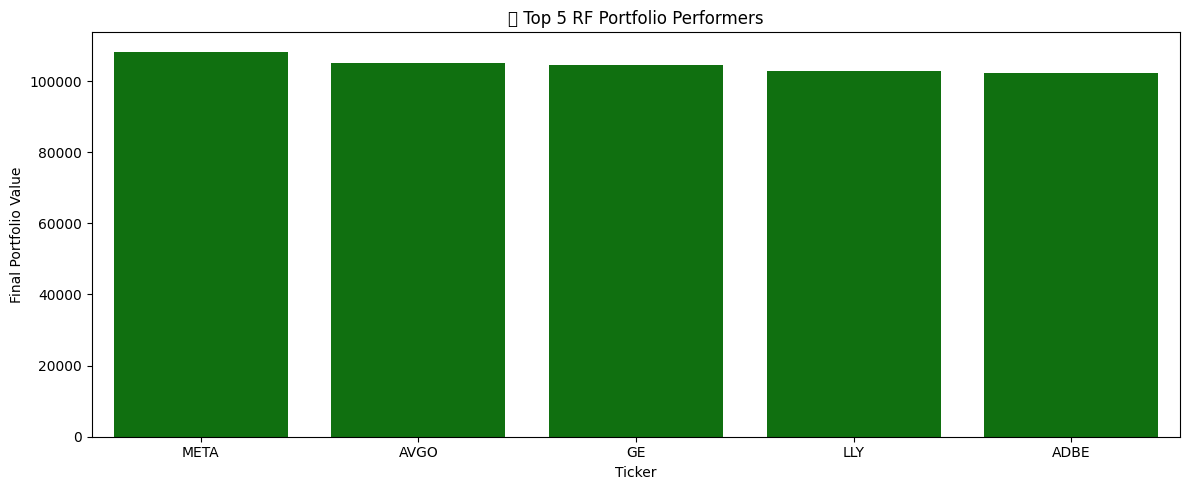

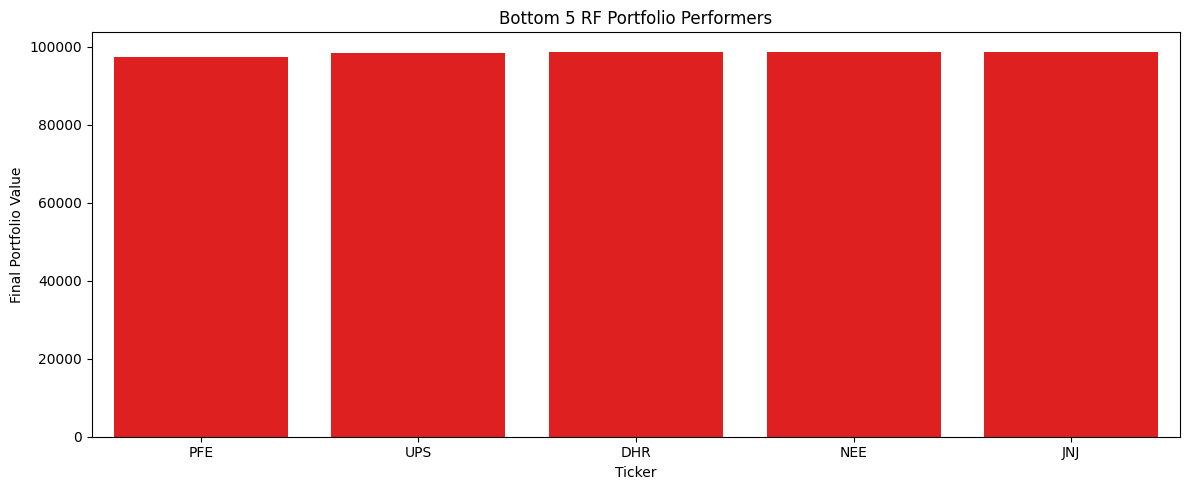

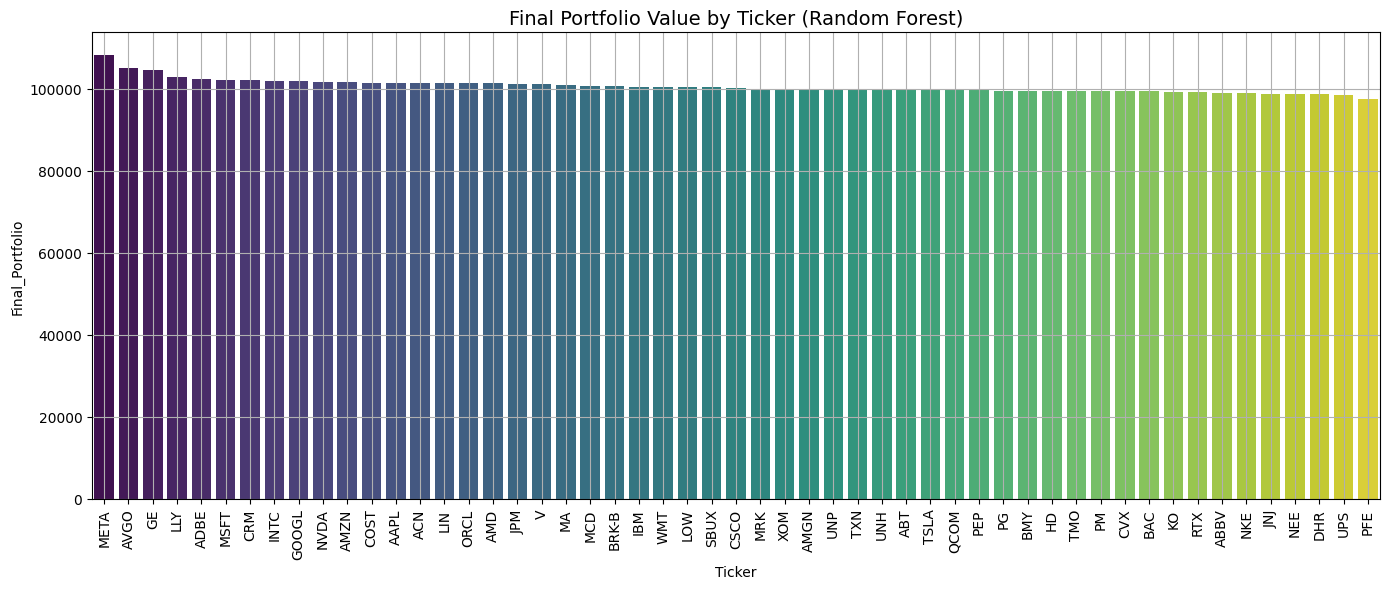

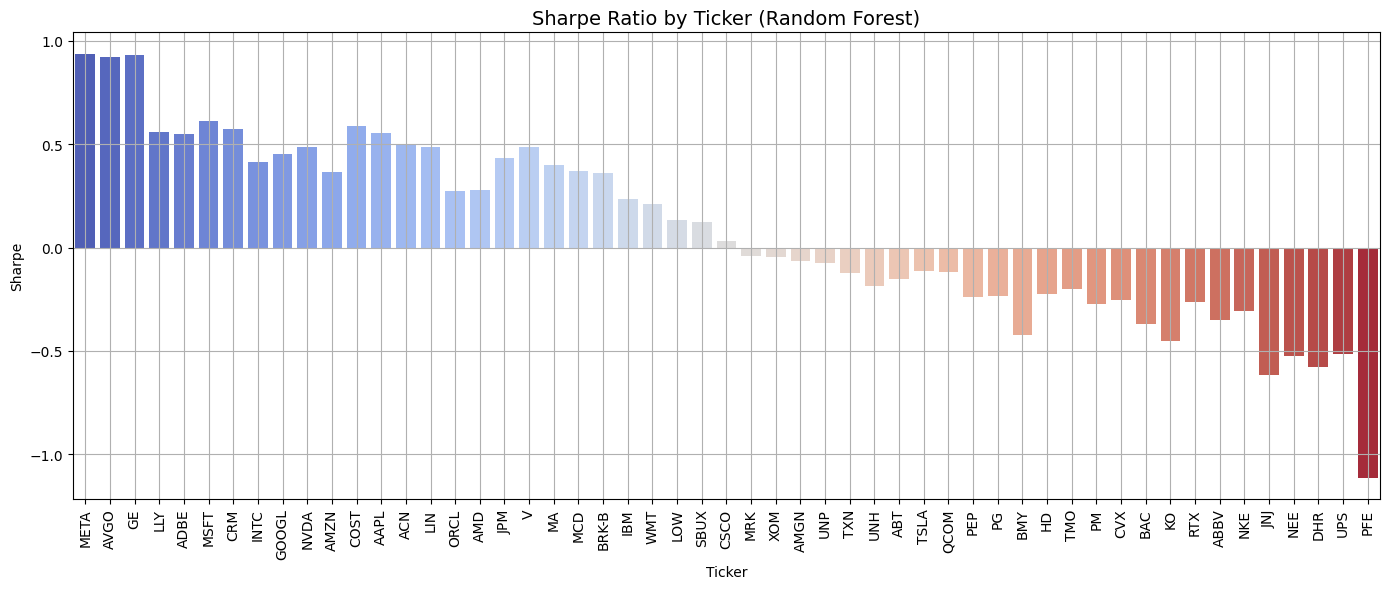

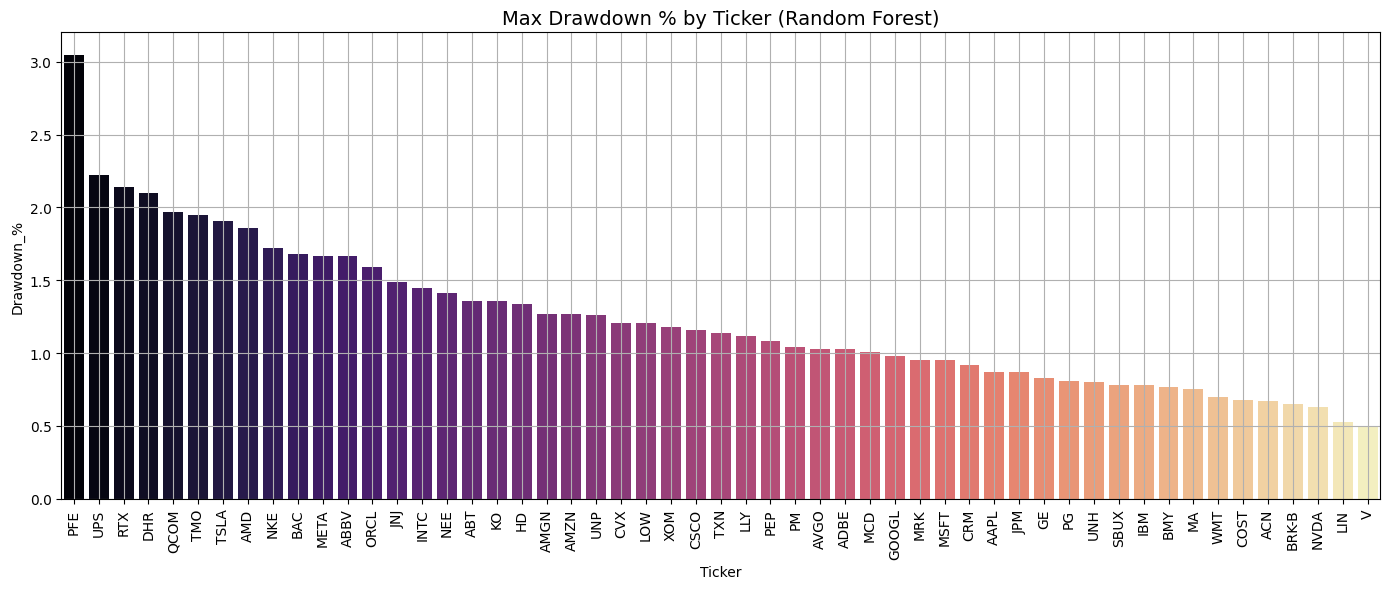

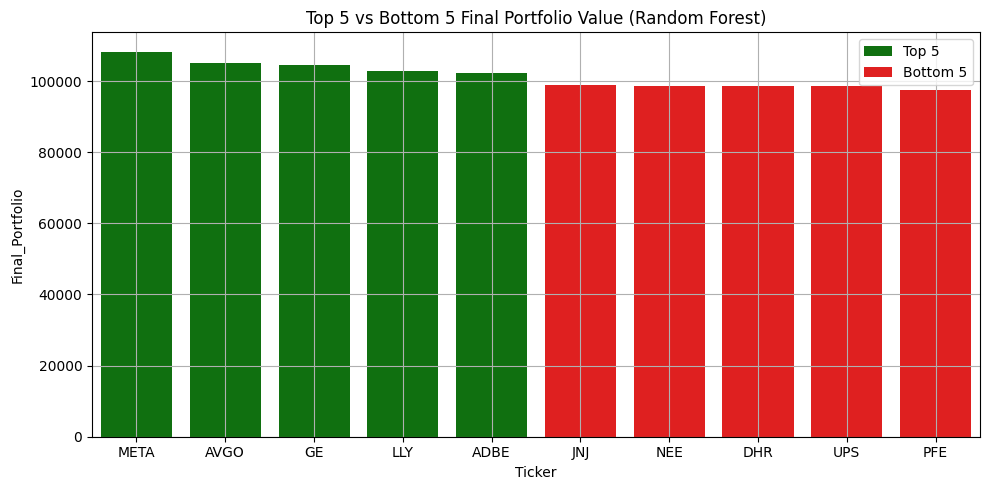

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load RF Results ===
rf_results_path = "results/rf_walkforward/summary.csv"

if os.path.exists(rf_results_path):
    rf_summary = pd.read_csv(rf_results_path)
    print(f"Loaded {len(rf_summary)} rows from Random Forest results")
    display(rf_summary.head())
else:
    raise FileNotFoundError("Summary file not found at path:", rf_results_path)

# === Aggregate Final Portfolio Metrics Per Ticker ===
agg_df = rf_summary.groupby("Ticker", as_index=False).agg({
    "Final_Portfolio": "mean",
    "BuyHold": "mean",
    "Sharpe": "mean",
    "Drawdown_%": "mean"
})

# === Identify Top and Bottom Performers ===
top5 = agg_df.nlargest(5, "Final_Portfolio")
bottom5 = agg_df.nsmallest(5, "Final_Portfolio")

# === Visualize Top vs Bottom ===
plt.figure(figsize=(12, 5))
sns.barplot(data=top5, x="Ticker", y="Final_Portfolio", color="green")
plt.title("🏆 Top 5 RF Portfolio Performers")
plt.ylabel("Final Portfolio Value")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(data=bottom5, x="Ticker", y="Final_Portfolio", color="red")
plt.title("Bottom 5 RF Portfolio Performers")
plt.ylabel("Final Portfolio Value")
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Use your RF results DataFrame — change name if needed
df_rf_viz = rf_summary.copy()
df_rf_viz = df_rf_viz.sort_values(by="Final_Portfolio", ascending=False)

# Final Portfolio Value
plt.figure(figsize=(14, 6))
sns.barplot(x="Ticker", y="Final_Portfolio", data=df_rf_viz, hue="Ticker", palette="viridis", dodge=False, legend=False)
plt.title("Final Portfolio Value by Ticker (Random Forest)", fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

# Sharpe Ratio
plt.figure(figsize=(14, 6))
sns.barplot(x="Ticker", y="Sharpe", data=df_rf_viz, hue="Ticker", palette="coolwarm", dodge=False, legend=False)
plt.title("Sharpe Ratio by Ticker (Random Forest)", fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

# Max Drawdown %
plt.figure(figsize=(14, 6))
sns.barplot(
    x="Ticker", y="Drawdown_%", data=df_rf_viz.sort_values(by="Drawdown_%", ascending=False),
    hue="Ticker", palette="magma", dodge=False, legend=False
)
plt.title("Max Drawdown % by Ticker (Random Forest)", fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

# Top 5 vs Bottom 5 Final Portfolio
top_5_rf = df_rf_viz.head(5)
bottom_5_rf = df_rf_viz.tail(5)

plt.figure(figsize=(10, 5))
sns.barplot(x="Ticker", y="Final_Portfolio", data=top_5_rf, color="green", label="Top 5")
sns.barplot(x="Ticker", y="Final_Portfolio", data=bottom_5_rf, color="red", label="Bottom 5")
plt.title("Top 5 vs Bottom 5 Final Portfolio Value (Random Forest)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

